In [1]:
import pandas as pd

In [2]:
df_content = pd.read_csv(r"C:\Users\user\Downloads\Content.csv")
df_content.head(5)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [3]:
df_Reactions = pd.read_csv(r"C:\Users\user\Downloads\Reactions.csv")
df_Reactions.head(3)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [4]:
df_ReactionTypes = pd.read_csv(r"C:\Users\user\Downloads\ReactionTypes.csv")
df_ReactionTypes.head(3)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0


In [5]:
df_clean_Content = df_content.drop(['User ID','URL'],axis=1)
df_clean_Content.head(5)

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [6]:
df_clean_Reaction = df_Reactions.drop(['User ID'],axis =1)
df_clean_Reaction.head(5)

,Unnamed: 0,Content ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


### null values

In [7]:
#dataframe 1
df_clean_Content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [8]:
#dataframe 2

df_clean_Reaction.isnull().sum()

Unnamed: 0      0
Content ID      0
Type          980
Datetime        0
dtype: int64

In [9]:
df_clean_Reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: int64(1), object(3)
memory usage: 798.7+ KB


In [10]:
df_clean_Reaction.dropna(axis='rows',inplace=True)

In [11]:
df_clean_Reaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24573 non-null  int64 
 1   Content ID  24573 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    24573 non-null  object
dtypes: int64(1), object(3)
memory usage: 959.9+ KB


In [12]:
#dataframe 3
df_ReactionTypes.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

### rename columns to avoid syntex error
here2 main problems found- 1. few values are in single qoutes and few are in double qoutes so replace them with empty
2. value are not in same syntax some are in upper and some in lower case 

In [13]:
df_clean_Content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [14]:
 df_clean_Content['Category']= df_clean_Content['Category'].str.replace('"', '').str.replace("'", '')

 df_clean_Content['Category']

0             Studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [15]:
df_clean_Content['Category'].unique()


array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [16]:
df_clean_Content['Category'].value_counts()

technology         72
animals            68
travel             67
culture            66
science            64
food               62
healthy eating     61
cooking            61
soccer             61
fitness            61
tennis             59
dogs               58
education          57
studying           56
veganism           49
public speaking    49
Fitness             5
Animals             4
Science             4
Soccer              3
Food                2
Studying            2
Education           2
Travel              2
Technology          1
Culture             1
Healthy Eating      1
Veganism            1
Public Speaking     1
Name: Category, dtype: int64

In [17]:
df_clean_Content['Category']= df_clean_Content['Category'].str.lower()
df_clean_Content['Category']

0             studying
1       healthy eating
2       healthy eating
3           technology
4                 food
            ...       
995    public speaking
996         technology
997           veganism
998            culture
999         technology
Name: Category, Length: 1000, dtype: object

In [18]:
df_clean_Content['Category'].unique()


array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [19]:
 df_clean_Content['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: Category, dtype: int64

In [20]:
merged_df= pd.merge(df_clean_Content,df_clean_Reaction, on = 'Content ID',how= 'left', suffixes = ('_content','_reaction'))
merged_df.head(5)

,Unnamed: 0_content,Content ID,Type_content,Category,Unnamed: 0_reaction,Type_reaction,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,1.0,disgust,2020-11-07 09:43:50
1,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,2.0,dislike,2021-06-17 12:22:51
2,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,3.0,scared,2021-04-18 05:13:58
3,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,4.0,disgust,2021-01-06 19:13:01
4,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,5.0,interested,2020-08-23 12:25:58


In [21]:
df_clean_Content['Type'].value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

In [22]:
df_clean_Reaction['Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Type, dtype: int64

In [23]:
df_ReactionTypes['Type'].value_counts()

heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: Type, dtype: int64

In [24]:
df_ReactionTypes['Sentiment'].value_counts()

positive    9
negative    5
neutral     2
Name: Sentiment, dtype: int64

### merging your three tables together

In [25]:
df_ReactionTypes.head(2)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70


In [26]:
df_ReactionTypes.rename(columns= {'Type':'Type_Reaction'},inplace=True)

In [27]:
df_clean_Content.head(2)

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [28]:
df_clean_Reaction.head(2)

,Unnamed: 0,Content ID,Type,Datetime
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51


In [29]:
df_ReactionTypes.set_index('Unnamed: 0',inplace=True)
df_clean_Content.set_index('Unnamed: 0',inplace=True)
df_clean_Reaction.set_index('Unnamed: 0',inplace=True)

In [30]:
merge_df = pd.merge(df_clean_Reaction,df_clean_Content, on= 'Content ID',suffixes= ('_Reaction','_Content'),how= 'left')
merge_df

,Content ID,Type_Reaction,Datetime,Type_Content,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [31]:
New_dataframe = pd.merge(merge_df,df_ReactionTypes, on ='Type_Reaction',how='left' )
New_dataframe.head(5)

,Content ID,Type_Reaction,Datetime,Type_Content,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [32]:
New_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Type_Reaction  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Type_Content   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [33]:
New_dataframe['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [34]:
New_dataframe.to_csv('cleaned_dataset.csv',index=False)

### import libraries or visualize insights

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Figure out the Top 5 performing categories 
# How many unique categories are there?
# How many reactions are there to the most popular category?
# What was the month with the most posts?
# what Type of content doing great

### Figure out the Top 5 performing categories



In [37]:
Top_categories = New_dataframe.groupby('Category')['Score'].sum().sort_values(ascending=False)
Top_5_categories = Top_categories.head(5)
Top_5_categories

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64

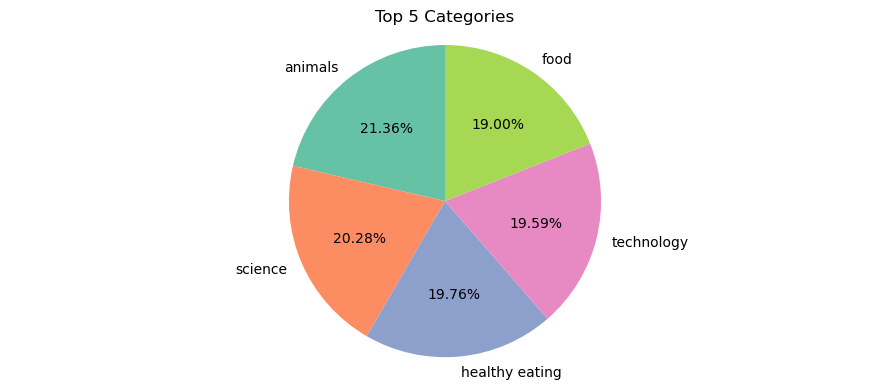

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))
plt.pie(
    Top_5_categories,          # Data to plot
    labels=Top_5_categories.index,  # Labels for the slices
    autopct='%1.2f%%',         # Percentage formatting
    colors=plt.cm.Set2.colors, # Use Set2 colormap's colors
    startangle=90              # Start pie chart at 90 degrees
)
plt.title('Top 5 Categories')
plt.axis('equal')              # Ensure pie is a perfect circle
plt.tight_layout()             # Adjust layout to prevent overlap
plt.show()


### How many unique categories are there?

In [39]:
CATEGORIES = New_dataframe['Category'].value_counts().sort_values(ascending=False)
CATEGORIES

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

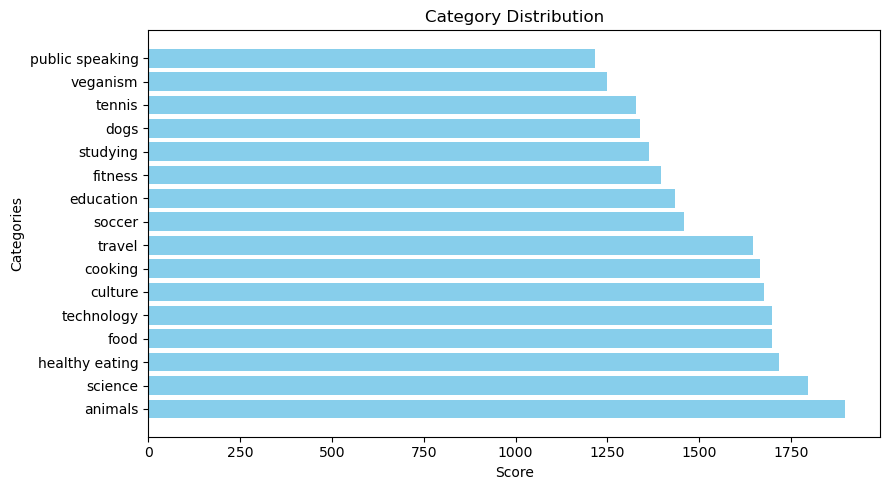

In [40]:
plt.figure(figsize=(9,5))
plt.barh(y=CATEGORIES.index,width= CATEGORIES.values, color='skyblue' )

plt.title( 'Category Distribution')
plt.xlabel('Score')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

###  what kind of content doing great

In [73]:
Typeof_content = New_dataframe.groupby('Type_Content').agg({'Score':'sum'}).reset_index()
Typeof_content

,Type_Content,Score
0,GIF,238217
1,audio,226127
2,photo,262838
3,video,246463


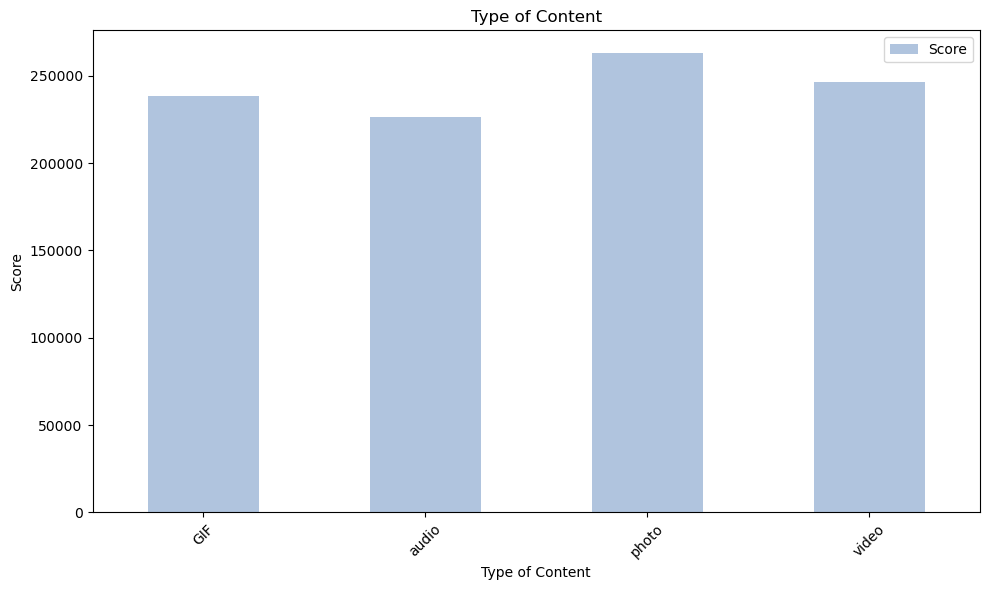

In [72]:
Typeof_content.plot(kind='bar', x='Type_Content', figsize=(10, 6), color='lightsteelblue')

plt.title('Type of Content')
plt.xlabel('Type of Content')  
plt.ylabel('Score')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


### How many reactions are there to the most popular category?

In [88]:
#Identify the most popular category
most_popular_category = New_dataframe.groupby('Category')['Score'].sum().idxmax()

# Filter the reactions data for the most popular category
reactions = New_dataframe.groupby(['Category', 'Type_Reaction']).agg({'Score': 'sum'})
reactions_for_most_popular = reactions.loc[most_popular_category].sort_values(by = 'Score',ascending = True)

In [89]:
reactions_for_most_popular

,Score
Type_Reaction,
disgust,0
hate,640
dislike,1150
worried,1452
scared,1980
indifferent,2000
interested,3300
peeking,4515
like,5050


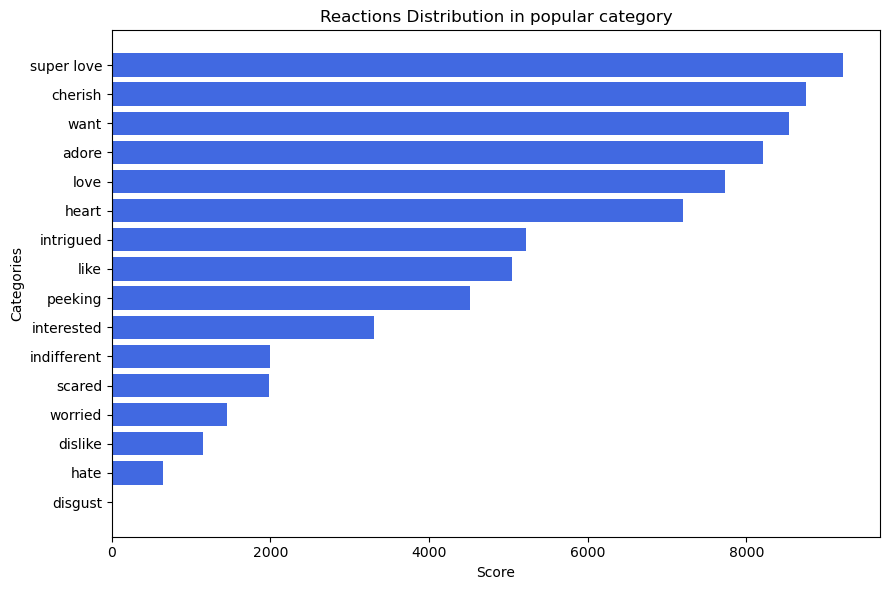

In [90]:
plt.figure(figsize=(9,6))
plt.barh(y=reactions_for_most_popular.index,width= reactions_for_most_popular['Score'],color='royalblue')
plt.title('Reactions Distribution in popular category')
plt.xlabel('Score')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

### What was the month with the most posts?

In [52]:
#ensure 'Datetime'is in datetime format
New_dataframe['Datetime'] = pd.to_datetime(New_dataframe['Datetime'])

#Extract year and month from the 'Datetime'column
New_dataframe['Month'] = New_dataframe['Datetime'].dt.to_period('M')

#Count posts per month
posts_per_month = New_dataframe['Month'].value_counts()

 #Find the month with the most posts
most_post_month = posts_per_month.idxmax()
most_posts_count = posts_per_month.max()

print(f'the month with the most post is {most_post_month}, with {most_posts_count}')

the month with the most post is 2021-05, with 2138


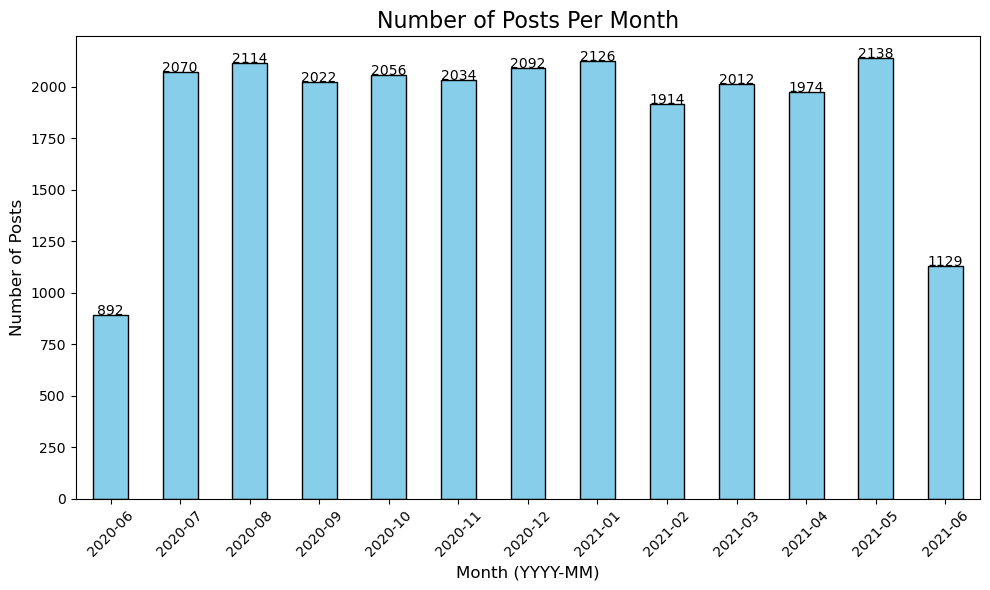

In [53]:
plt.figure(figsize=(10, 6))
posts_per_month.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Posts Per Month', fontsize=16)
plt.xlabel('Month (YYYY-MM)', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)

for idx, value in enumerate(posts_per_month.sort_index()):
    plt.text(idx, value + 0.1, str(value), ha='center', fontsize=10)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
